<a href="https://colab.research.google.com/github/fgokmenoglu/KERAS/blob/main/Keras_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels = []
train_samples = []

In [ ]:
for i in range(50):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [ ]:
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs Available: ", len(physical_devices))

Number of GPUs Available:  0


In [ ]:
model = Sequential([
  Dense(units = 16, input_shape = (1, ), activation = 'relu'),
  Dense(units = 32, activation = 'relu'),
  Dense(units = 2, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.7678 - accuracy: 0.4418 - val_loss: 0.7267 - val_accuracy: 0.4476 - 1s/epoch - 6ms/step
Epoch 2/30
189/189 - 0s - loss: 0.7153 - accuracy: 0.3598 - val_loss: 0.6910 - val_accuracy: 0.5095 - 343ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6654 - accuracy: 0.7249 - val_loss: 0.6524 - val_accuracy: 0.7048 - 356ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.6189 - accuracy: 0.7857 - val_loss: 0.6196 - val_accuracy: 0.7190 - 333ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5820 - accuracy: 0.8159 - val_loss: 0.5940 - val_accuracy: 0.7667 - 337ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5523 - accuracy: 0.8434 - val_loss: 0.5721 - val_accuracy: 0.7762 - 381ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5242 - accuracy: 0.8593 - val_loss: 0.5496 - val_accuracy: 0.8000 - 346ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4967 - accuracy: 0.8683 - val_loss: 0.5283 - val_accuracy: 0.8095 - 280ms/epoch - 1ms/step
Epo

In [ ]:
test_labels = []
test_samples = []

In [ ]:
for i in range(10):
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)

In [ ]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [ ]:
test_labels, test_samples = shuffle(test_labels, test_samples)

In [ ]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [ ]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

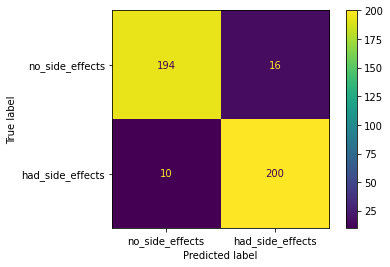

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
cm_plot_labels = ['no_side_effects', 'had_side_effects']
ConfusionMatrixDisplay.from_predictions(y_true=test_labels, y_pred=rounded_predictions, display_labels=cm_plot_labels)

In [ ]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

[array([[-0.45070052,  0.45687002, -0.17410052, -0.07135314,  0.5629671 ,
          0.47869813,  0.42041758,  0.50390136, -0.31098226, -0.1361238 ,
          0.64792085, -0.39675552, -0.46019417, -0.142977  ,  0.08576921,
          0.65481484]], dtype=float32),
 array([ 0.        , -0.07992733,  0.        ,  0.        , -0.1391473 ,
        -0.12961085,  0.26764807, -0.09617347,  0.        ,  0.        ,
        -0.16860466,  0.        ,  0.        ,  0.        ,  0.27313295,
        -0.15611695], dtype=float32),
 array([[-1.05056167e-02, -2.90249228e-01, -1.20610207e-01,
         -6.16707802e-02, -3.30915213e-01,  2.32593417e-02,
         -1.07597873e-01, -3.01076263e-01, -3.49073350e-01,
          1.88262790e-01, -6.06247783e-03,  2.65490502e-01,
          1.92362279e-01,  1.35257155e-01, -2.21980959e-01,
         -2.08433867e-02, -6.57133460e-02,  1.55302256e-01,
         -5.92209697e-02, -3.31902295e-01,  1.26224846e-01,
          8.39203596e-03, -5.65338433e-02, -4.35221791e-02,
 

In [ ]:
new_model.optimizer

In [ ]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
  model.save_weights('models/my_model_weigths.h5')

In [ ]:
model2 = Sequential([
  Dense(units = 16, input_shape = (1, ), activation = 'relu'),
  Dense(units = 32, activation = 'relu'),
  Dense(units = 2, activation = 'softmax')
])

In [ ]:
model2.load_weights('models/my_model_weigths.h5')

In [ ]:
model2.get_weights()

[array([[-0.45070052,  0.45687002, -0.17410052, -0.07135314,  0.5629671 ,
          0.47869813,  0.42041758,  0.50390136, -0.31098226, -0.1361238 ,
          0.64792085, -0.39675552, -0.46019417, -0.142977  ,  0.08576921,
          0.65481484]], dtype=float32),
 array([ 0.        , -0.07992733,  0.        ,  0.        , -0.1391473 ,
        -0.12961085,  0.26764807, -0.09617347,  0.        ,  0.        ,
        -0.16860466,  0.        ,  0.        ,  0.        ,  0.27313295,
        -0.15611695], dtype=float32),
 array([[-1.05056167e-02, -2.90249228e-01, -1.20610207e-01,
         -6.16707802e-02, -3.30915213e-01,  2.32593417e-02,
         -1.07597873e-01, -3.01076263e-01, -3.49073350e-01,
          1.88262790e-01, -6.06247783e-03,  2.65490502e-01,
          1.92362279e-01,  1.35257155e-01, -2.21980959e-01,
         -2.08433867e-02, -6.57133460e-02,  1.55302256e-01,
         -5.92209697e-02, -3.31902295e-01,  1.26224846e-01,
          8.39203596e-03, -5.65338433e-02, -4.35221791e-02,
 